# Machine Learning with the use of Density Estimation

This notebook provides a quick summary and introduction on how to use the $\texttt{DataSet}$, $\texttt{Classification}$ and $\texttt{Clustering}$ wrappers in the $\texttt{DEMachineLearning}$ module.
For a detailed explanation on the algorithms used in this implementation, please refer directly to the documentation of said module or the corresponding Bachelor's Thesis "Machine Learning with the Sparse Grid Density Estimation using the Combination Technique".

Since most machine learning tasks operate on some sets of data, either for learning or testing purposes, the helper-class $\texttt{DataSet}$ was created to assist in the construction of the $\texttt{Classification}$ and $\texttt{Clustering}$ classes, which implement the actual machine learning algorithms. The following three subsections explain those three classes accordingly in more detail.

***

### The DataSet class

The core functionality of $\texttt{DataSet}$ is to store some data in a convenient and consistent way to perform various tasks with (here only, but not limited to classification and clustering). Therefore the actual data is stored within the protected attribute $\texttt{data}$ in the form of a tuple with two ndarray-entries, whereas the first entry represents the actual samples and the second one the corresponding labels. This $\texttt{data}$ is initialized with a necessary $\texttt{raw_data}$ constructor parameter, along with some other optional ones, which set the $\texttt{name}$ or $\texttt{label}$-type of a $\texttt{DataSet}$ object.
The $\texttt{raw_data}$ parameter will always be parsed into the previously described form of a 2-length-tuple, but can be passed to the constructor in two ways:
+ a $n$-dimensional ndarray with type $\texttt{float64}$
+ a 2-dimensional tuple with its first entry being a $n$-dimensional ndarray of size $m$ with type $\texttt{float64}$ and its second entry being a 2-dimensional ndarray of size $m$ with type $\texttt{int64}$

In the following code example, this $\texttt{raw_data}$ parameter will be generated or loaded with the help of the $\textit{scikit-learn library}$.

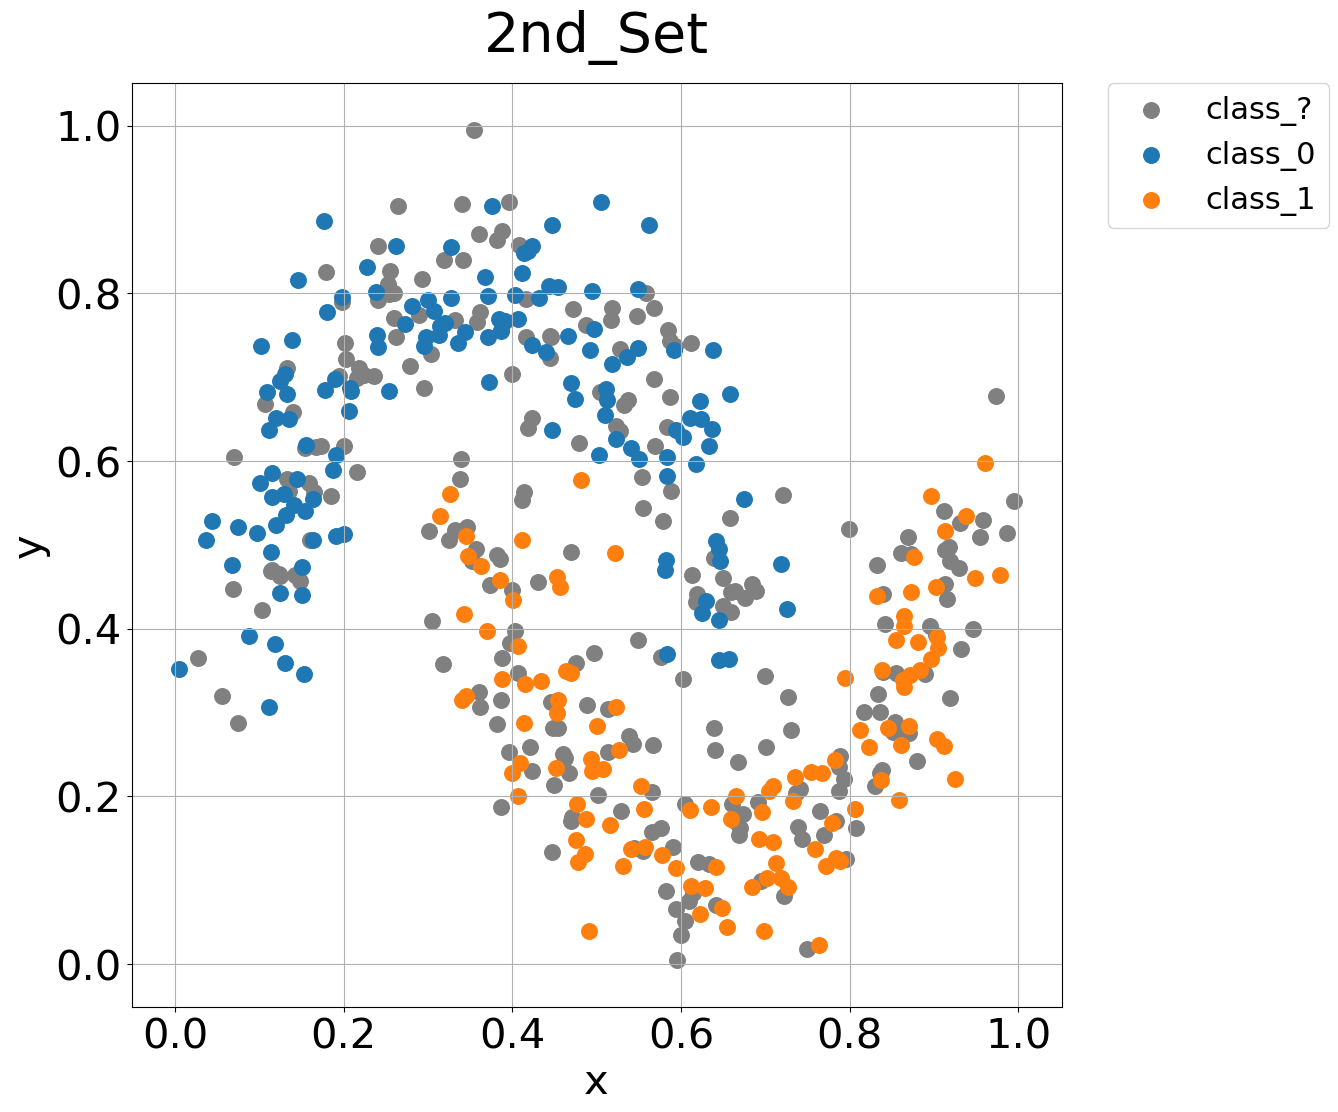

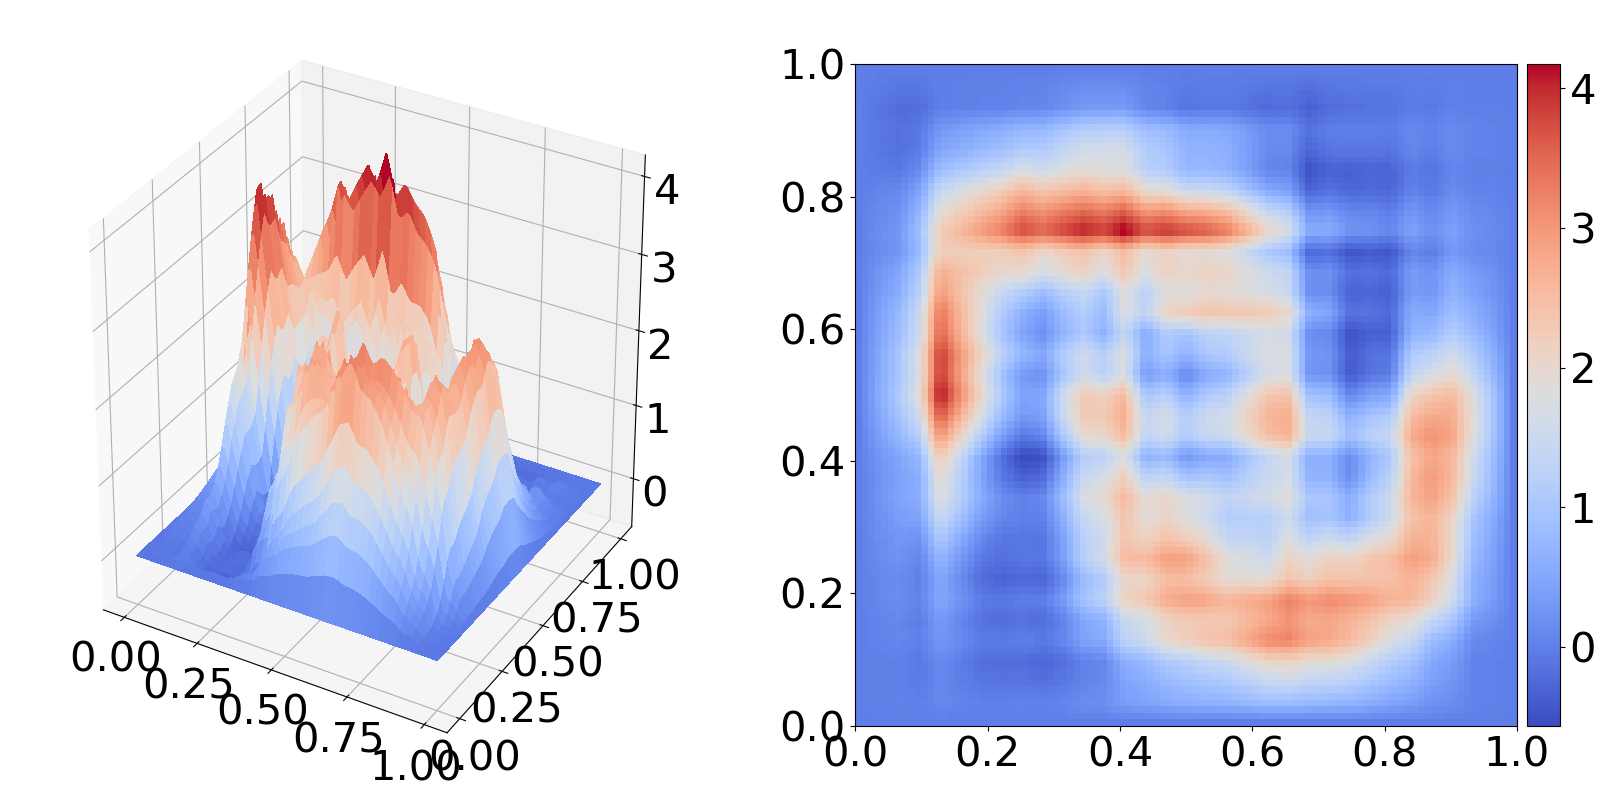

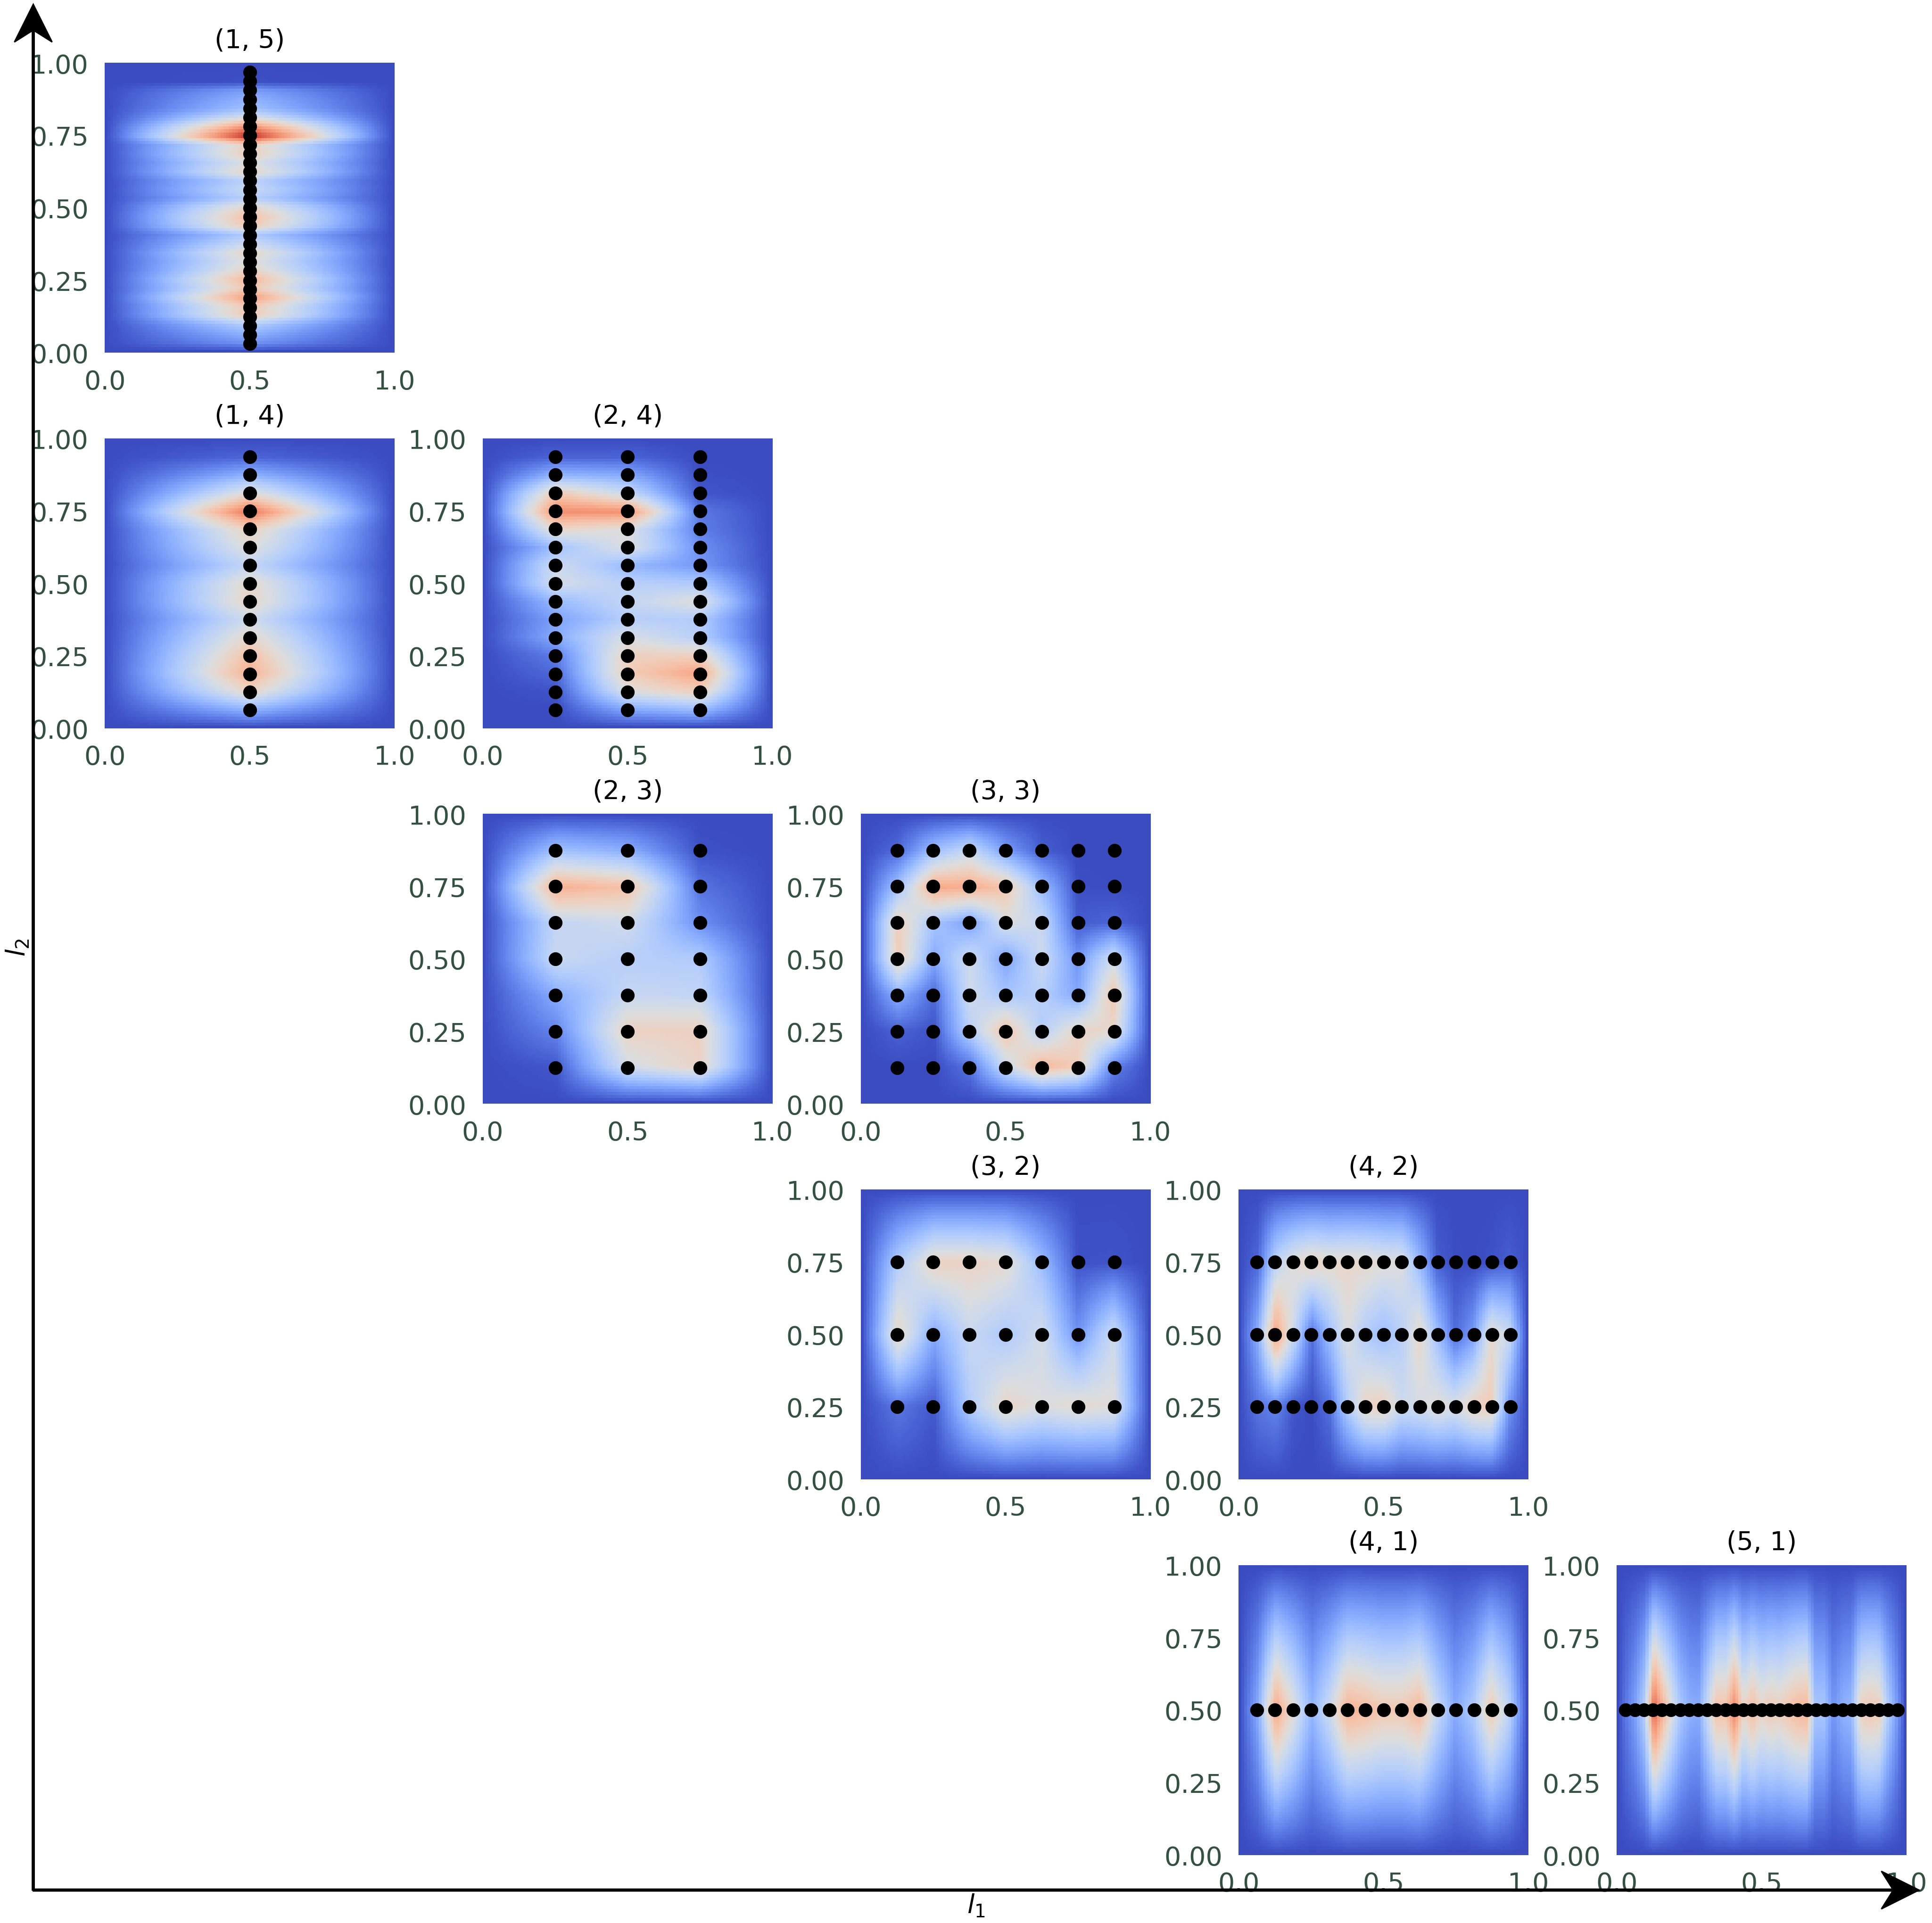

In [38]:
from sys import path
path.append('../src/')
import DEMachineLearning as deml


# generate a data set of size "samples", features "dimension" and classes "labels" with the sklearn library
samples = 500
dimension = 2
labels = 6
# sklearn_dataset = deml.datasets.make_circles(n_samples=samples, noise=0.05)
sklearn_dataset = deml.datasets.make_moons(n_samples=samples, noise=0.15)
# sklearn_dataset = deml.datasets.make_classification(n_samples=samples, n_features=dimension, n_redundant=0, n_clusters_per_class=1, n_informative=2, n_classes=(labels if labels < 4 else 4))
# sklearn_dataset = deml.datasets.make_blobs(n_samples=samples, n_features=dimension, centers=labels)
# sklearn_dataset = deml.datasets.make_gaussian_quantiles(n_samples=samples, n_features=dimension, n_classes=labels)
# sklearn_dataset = deml.datasets.load_digits(return_X_y=True) # hint: try only with max_level <= 3
# sklearn_dataset = deml.datasets.load_iris(return_X_y=True)
# sklearn_dataset = deml.datasets.load_breast_cancer(return_X_y=True) # hint: try only with max_level <= 4
# sklearn_dataset = deml.datasets.load_wine(return_X_y=True)

# now we can transform this dataset into a DataSet object and give it an appropriate name
data = deml.DataSet(sklearn_dataset, name='Input_Set')

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# now let's look at some functions of the DataSet class

# DataSet objects can e.g. be ...
data_copy = data.copy()                                              # deepcopied
data_copy.scale_range((0.005, 0.995))                                     # scaled
part0, part1 = data_copy.split_pieces(0.5)                           # split
data_copy = part0.concatenate(part1)                                 # concatenated
data_copy.set_name('2nd_Set')                                        # renamed
data_copy.remove_labels(0.5)                                         # freed of some label assignments to samples
without_labels, with_labels = data_copy.split_without_labels()       # seperated into samples with and without classes
data_copy.plot()                                                     # plotted

# and of course a regular density estimation can also be performed on a DataSet object:
de_retval = data_copy.density_estimation(plot_de_dataset=False, plot_sparsegrid=False, plot_density_estimation=True, plot_combi_scheme=True)

***

### The Classification class

Classification tasks can be performed on previously created $\texttt{DataSet}$ objects. Therefore this process is divided into the key steps $\textit{initialization}$, $\textit{perform learning}$ and $\textit{evaluation}$.

In the initialization step, the constructor of the $\texttt{Classification}$ class is called with one necessary data parameter and some optional parameters:
+ The initial $\texttt{DataSet}$ on which to perform the classification task.
+ An optional explicitly stated data range of the data set.
+ A percentage factor, which specifies how much of the input data set should be used for learning. The rest will be used for testing later on.
+ A boolean value, which specifies whether the learning data should consist of evenly or randomly sized classes (not important if 0 < percentage < 1).
+ Another boolean value, which specifies whether the data should be shuffled to ensure a random distrubution of samples before the learning is performed.

Learning is performed based on the $\texttt{DensityEstimation}$ class in the $\texttt{GridOperation}$ module. So the learning process can either be done regularly with $\texttt{perform_classification}$ or dimension wise with $\texttt{perform_classification_dimension_wise}$. The input parameters for those functions are those of the underlying density estimation plus a boolean value, which specifies whether learning performance metrics should be printed. Note that learning can only performed once on a $\texttt{Classification}$ object.

There are various options for evaluating the results of a performed classification learning task. Some are presented in the following code example.


Performed Classification of 'Input_Set' DataSet.
Time used: 0.0229175091 seconds


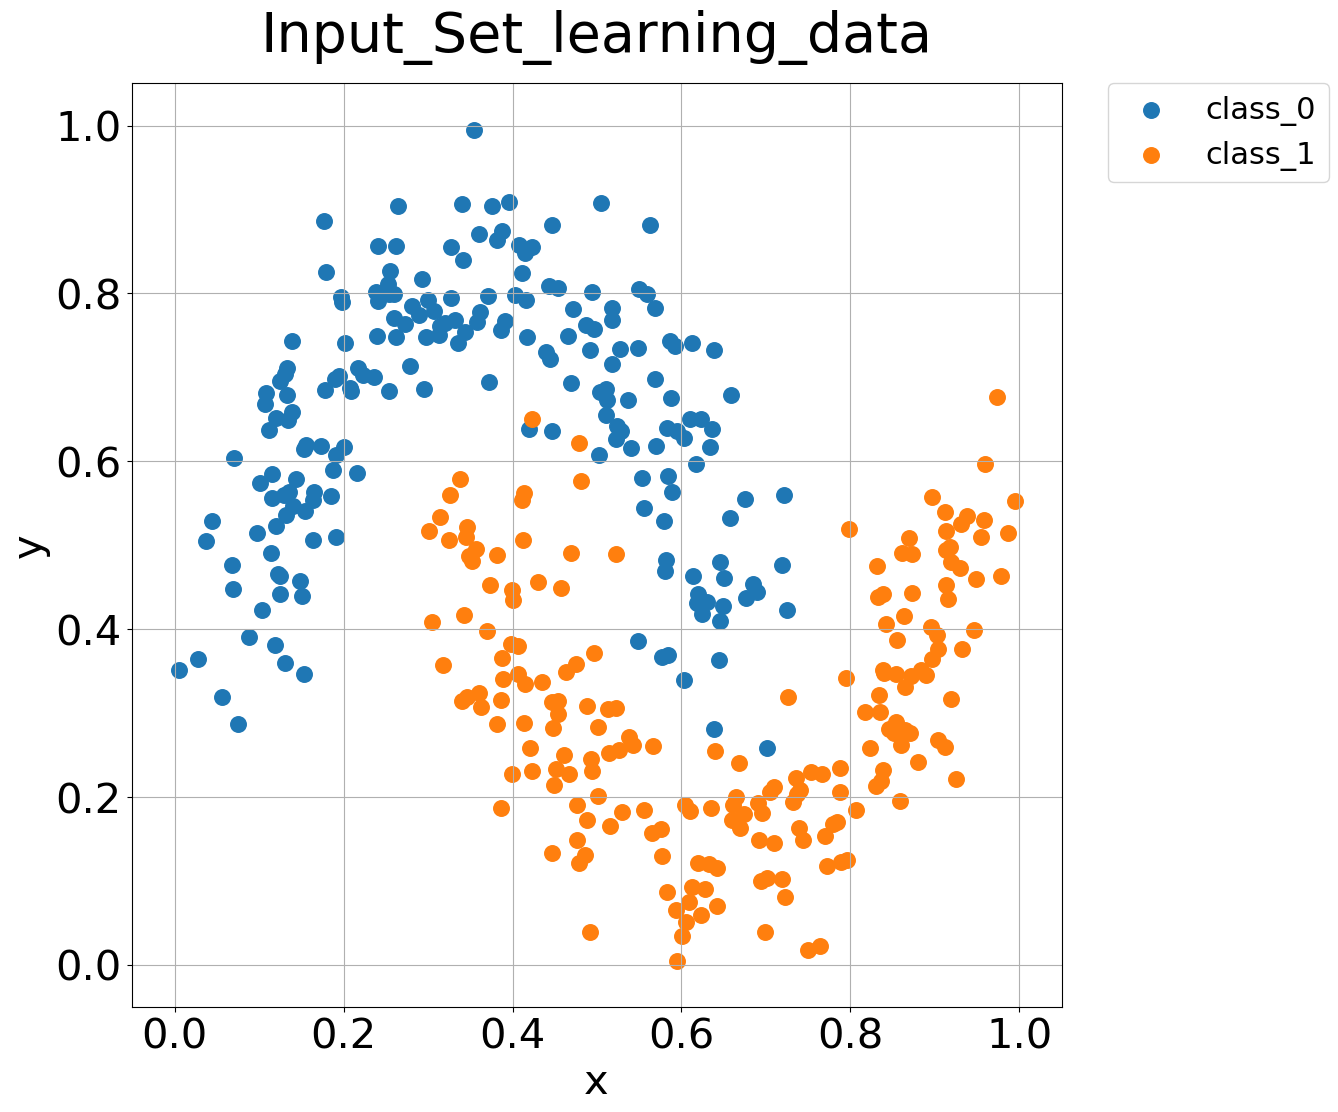

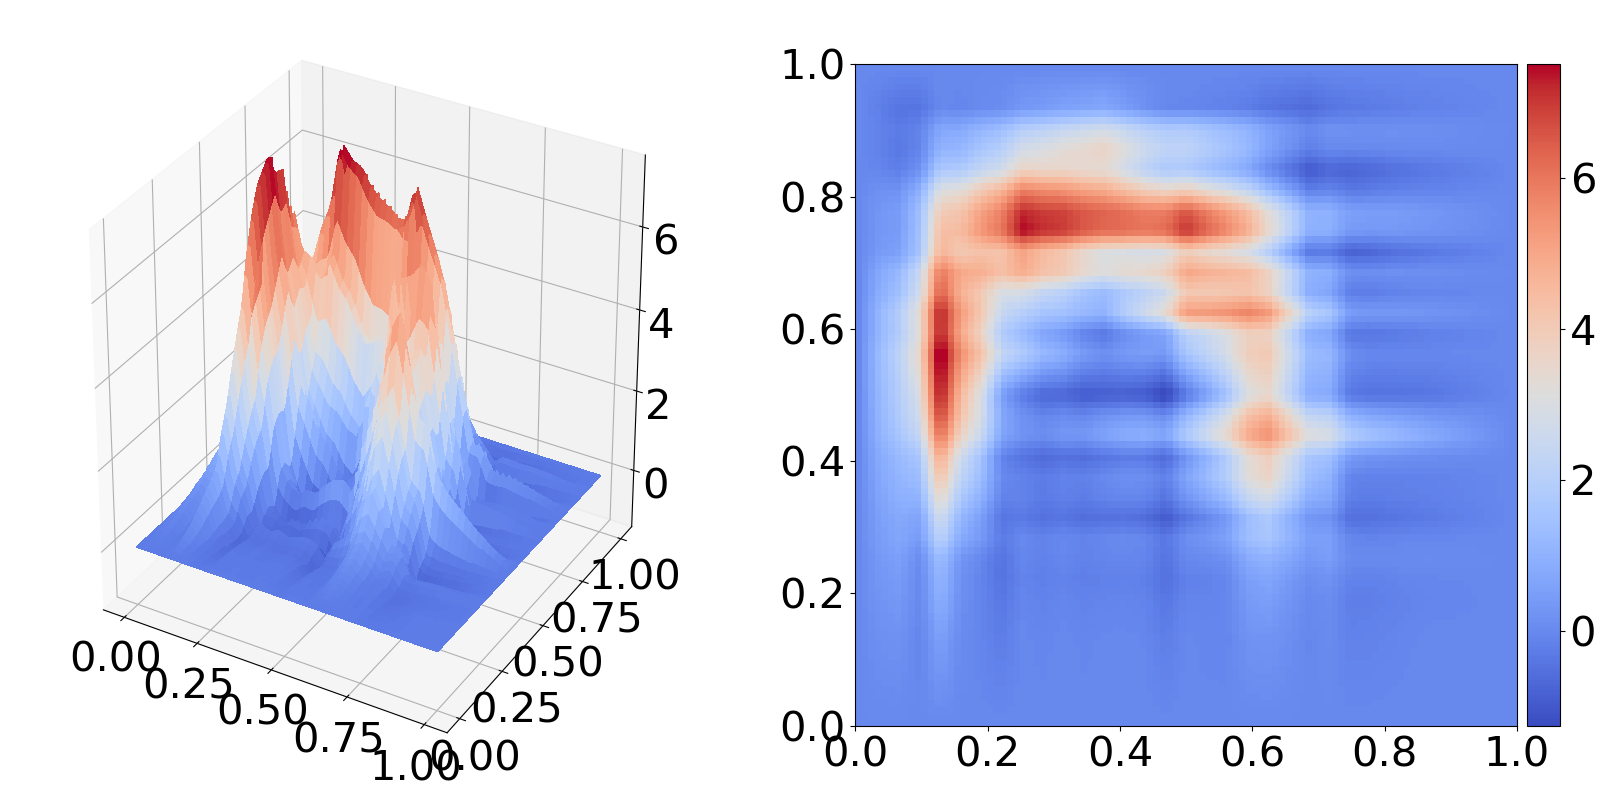

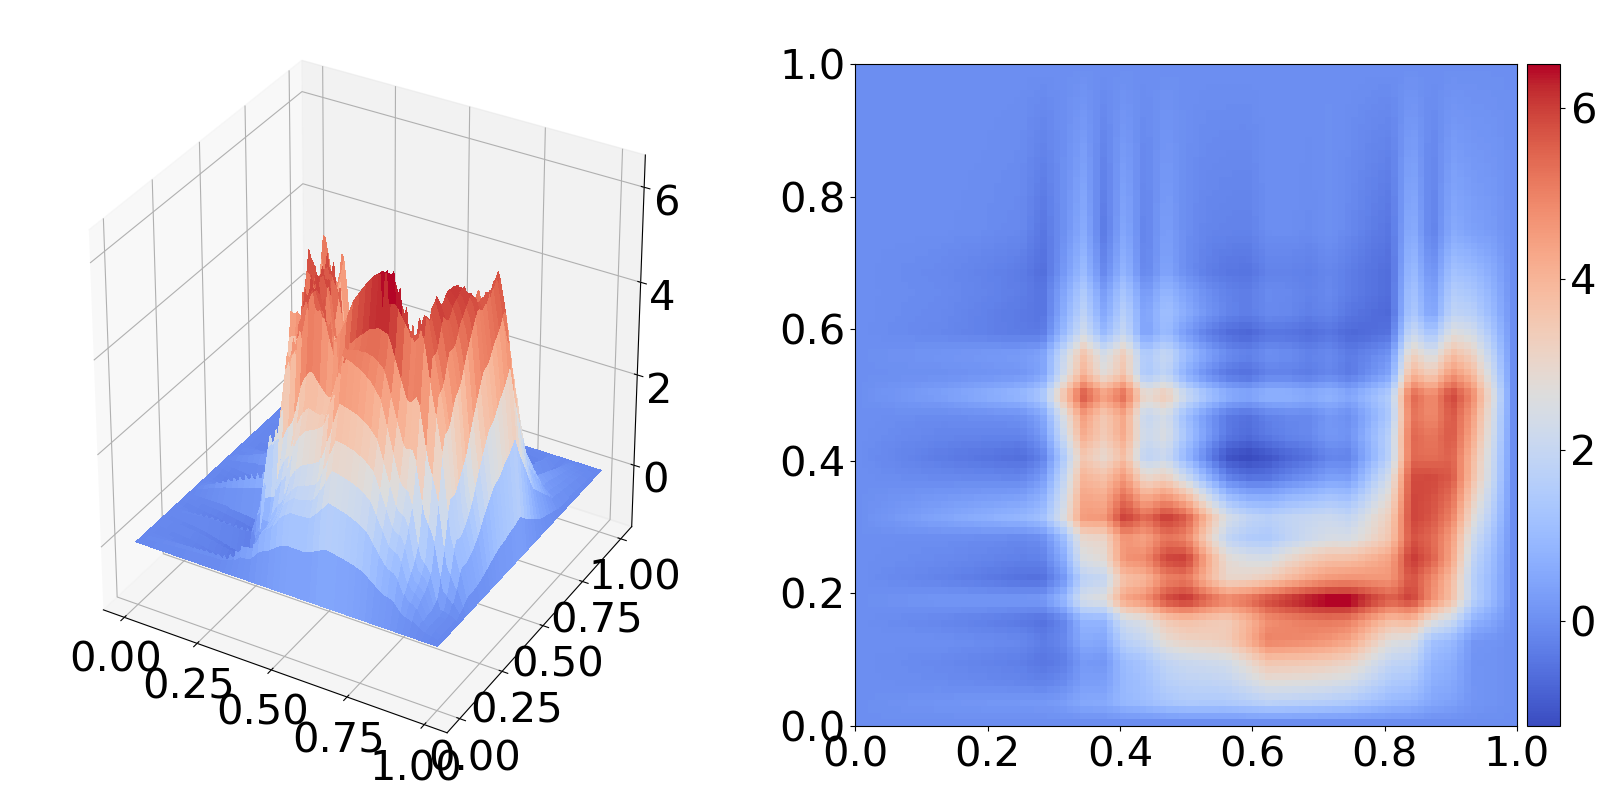

---------------------------------------------------------------------------------------------------------------------------------
Printing evaluation of all current testing data...
Number of wrong mappings: 1
Number of total mappings: 100
Percentage of correct mappings: 99.00%
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Points mapped incorrectly:
0: [0.69983644 0.34384564] | correct class: 0, calculated class: 1 | density_class0: [0.86218125], density_class1: [1.16216089], 
---------------------------------------------------------------------------------------------------------------------------------
Testing classes of Test_new_data DataSet...
Number of wrong mappings: 0
Number of total mappings: 250
Percentage of correct mappings: 100.00%
---------------------------------------------------------------------------------------------------------------------------------
Evaluating classes of 2nd_Set Dat

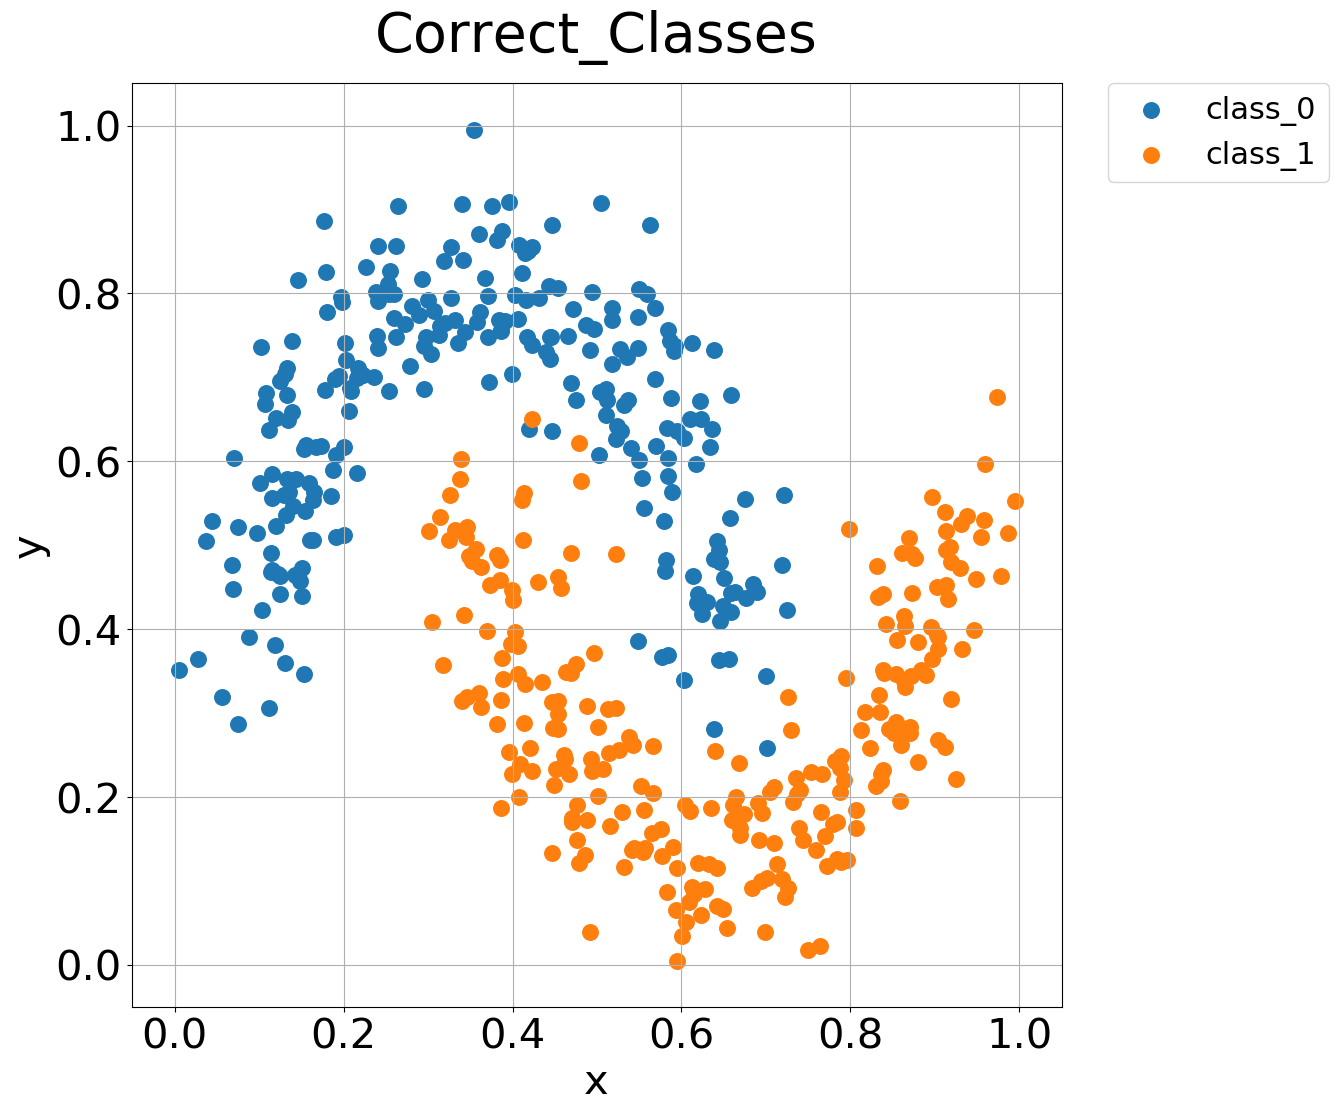

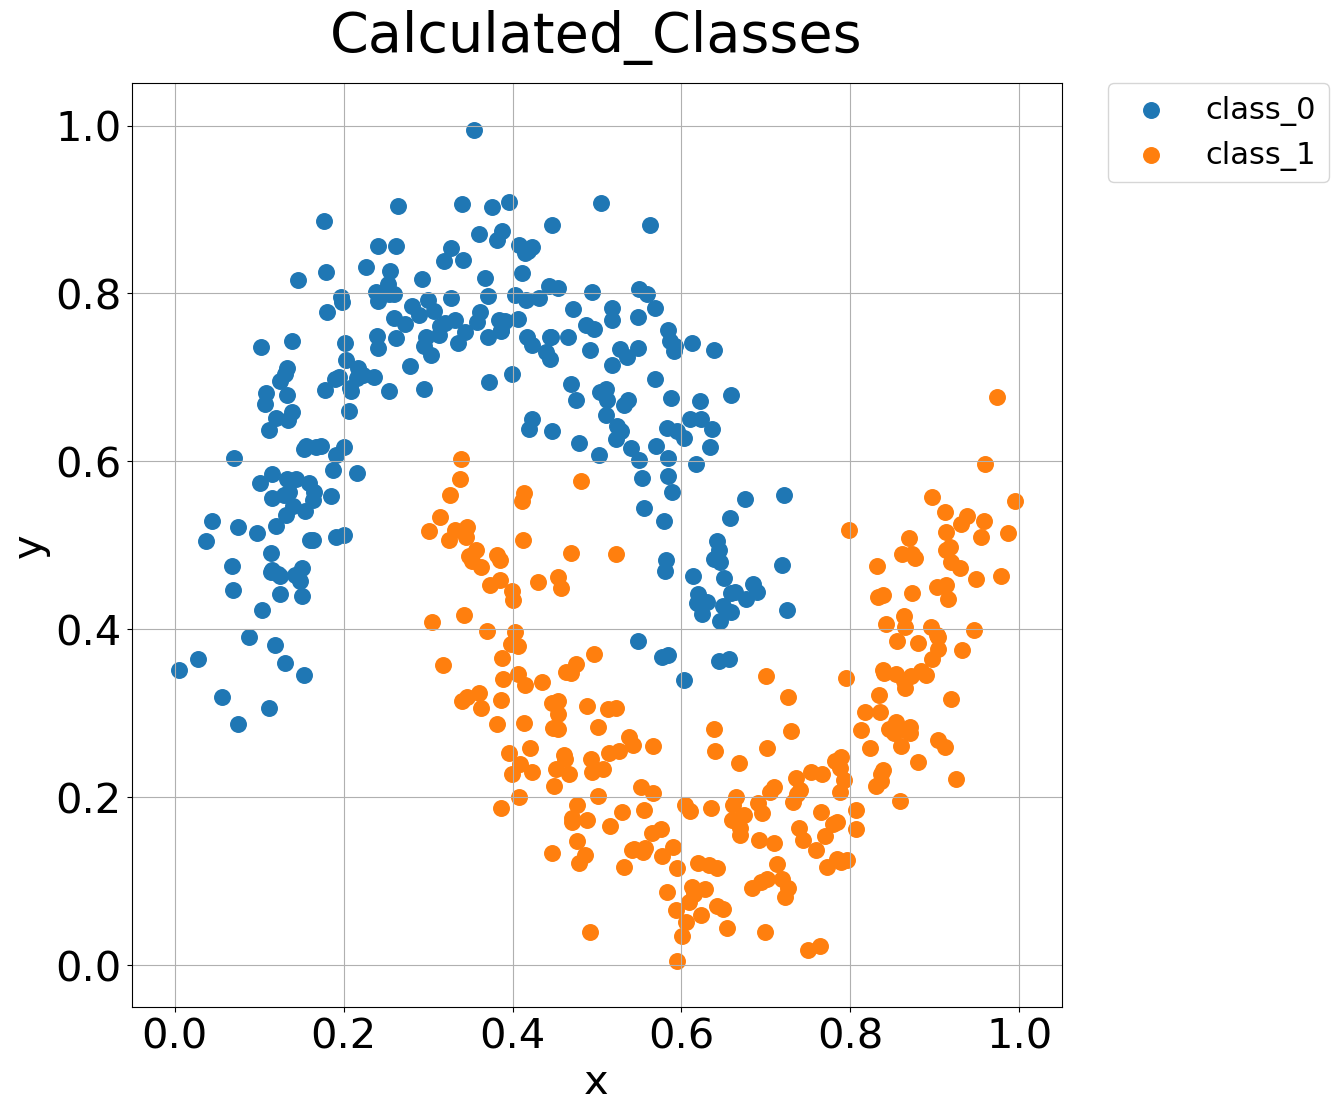

In [39]:
# initialize Classification object with the original unedited data
# 80% of this data is going to be used as learning part with equally distributed classes
classification = deml.Classification(data, split_percentage=0.8, split_evenly=True, shuffle_data=True)

# after that, the learning process of classification should be performed immediately, since no other method can be called before that without raising an error
classification.perform_classification(masslumping=True, lambd=0.0, minimum_level=1, maximum_level=5, print_metrics=True)
# classification.perform_classification_dimension_wise(masslumping=True, lambd=0.0, minimum_level=1, maximum_level=5, print_metrics=True)

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# now some other operations can be performed on the Classification object and results can be evaluated

# e.g. the object's classificators and corresponding density estimations could be plotted
classification.plot(plot_class_sparsegrid=False, plot_class_combi_scheme=False, plot_class_dataset=True, plot_class_density_estimation=True)

# if some testing data is already added to the Classification object (which here is the case, since 20% of samples are testing samples), its evaluation can be printed already
classification.print_evaluation(print_incorrect_points=True)

# also more testing data can be added and the results can be printed immediately
with_labels.set_name("Test_new_data")
classification.test_data(with_labels, print_output=True)

# and the Classification object can be called to perform blind classification on a dataset with unknown class assignments to its samples
data_copy.remove_labels(1.0)
calcult_classes = classification(data_copy)

# if the used data set is two- or three-dimensional, the results can be plotted to easily see, which samples were classified correctly and which were not
correct_classes = data.copy()
correct_classes.scale_range((0.005, 0.995))
correct_classes.set_name('Correct_Classes')
calcult_classes.set_name('Calculated_Classes')
retfig0 = correct_classes.plot()
retfig1 = calcult_classes.plot()

***

### The Clustering class

Clustering is also performed on those previously created $\texttt{DataSet}$ objects. To provide a similar interface, the individual process steps remain similar, while the algorithm itself is fundamentally different.

In the initialization step, the constructor of the $\texttt{Clustering}$ class is called with one necessary data parameter and some optional parameters:
+ The initial $\texttt{DataSet}$ on which to perform the clustering task.
+ An integer value, which specifies the number of nearest neighbors for the connected graph.
+ A percentage value, which specifies the threshold with which the edges of the nearest neighbor graph should be omitted.

Learning is performed based on the $\texttt{DensityEstimation}$ class in the $\texttt{GridOperation}$ module. So the learning process can either be done regularly with $\texttt{perform_clustering}$ or dimension wise with $\texttt{perform_clustering_dimension_wise}$. The input parameters for those functions are those of the underlying density estimation plus a boolean value, which specifies whether learning performance metrics should be printed. Note that learning can only performed once on a $\texttt{Clustering}$ object.

After the performed learning process of a clustering task, results can be evaluated either by printing by by plotting.


Performed Clustering of 'Input_Set' DataSet.
Time used: 0.7779200077 seconds
---------------------------------------------------------------------------------------------------------------------------------
Evaluating Clustering object ...
Number of wrong mappings: 41
Number of total mappings: 500
Percentage of correct mappings: 91.80%
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Number original clusters: 2
Number computed clusters: 2
Original data (per label):
0: 216 samples
1: 249 samples
Clustered data (per cluster):
0: 216 samples
1: 249 samples


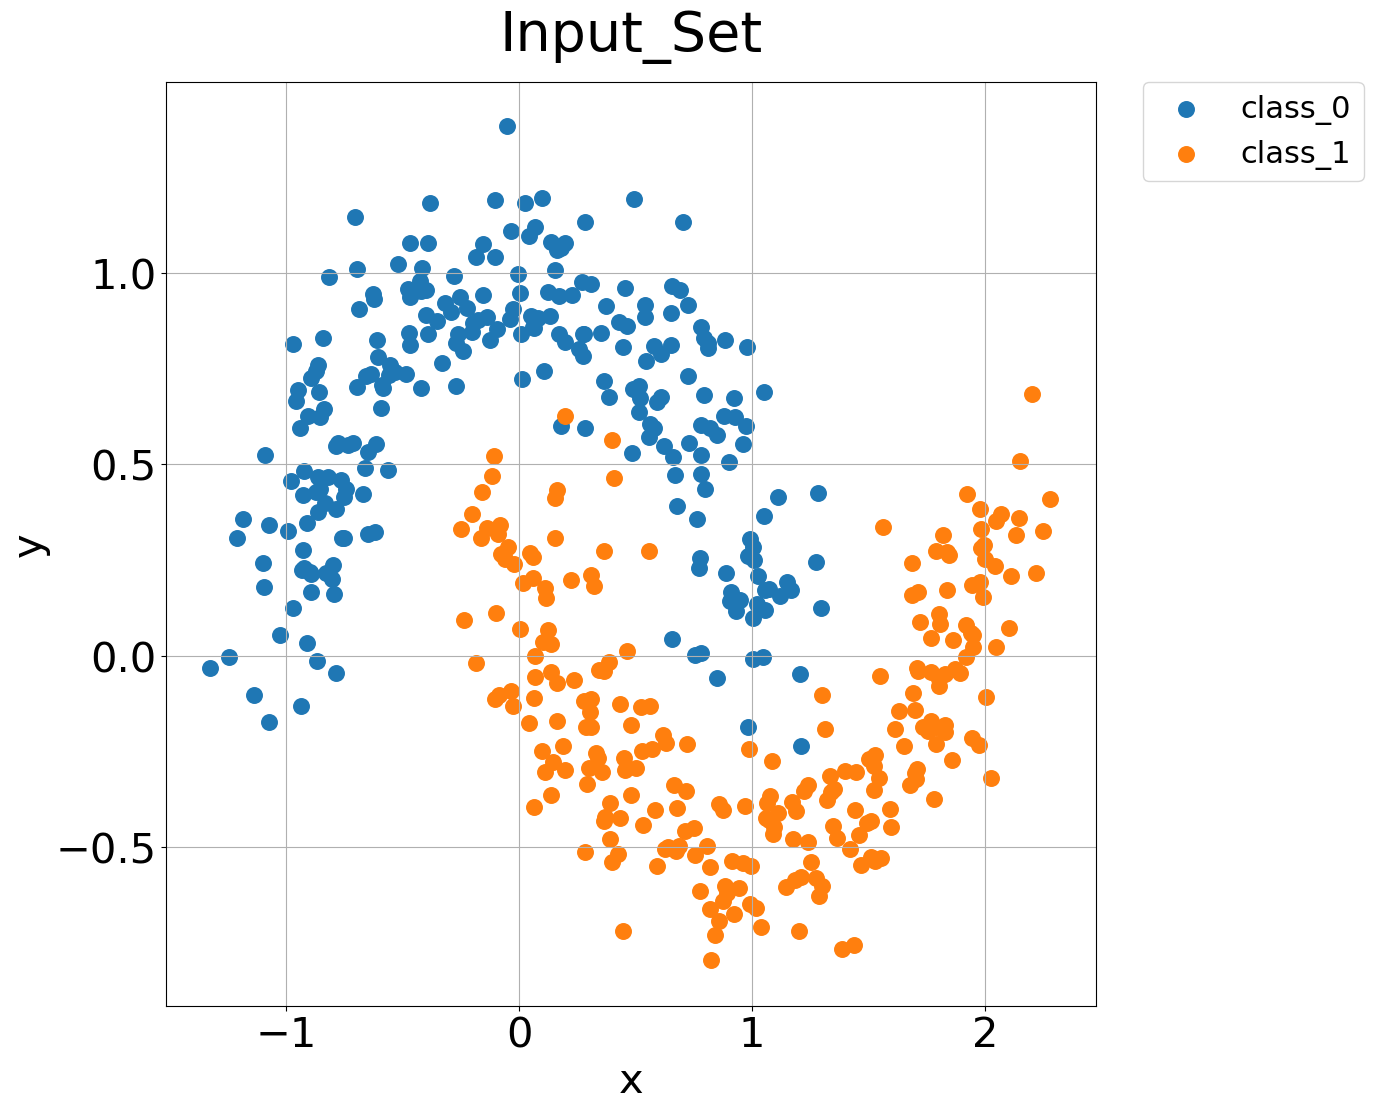

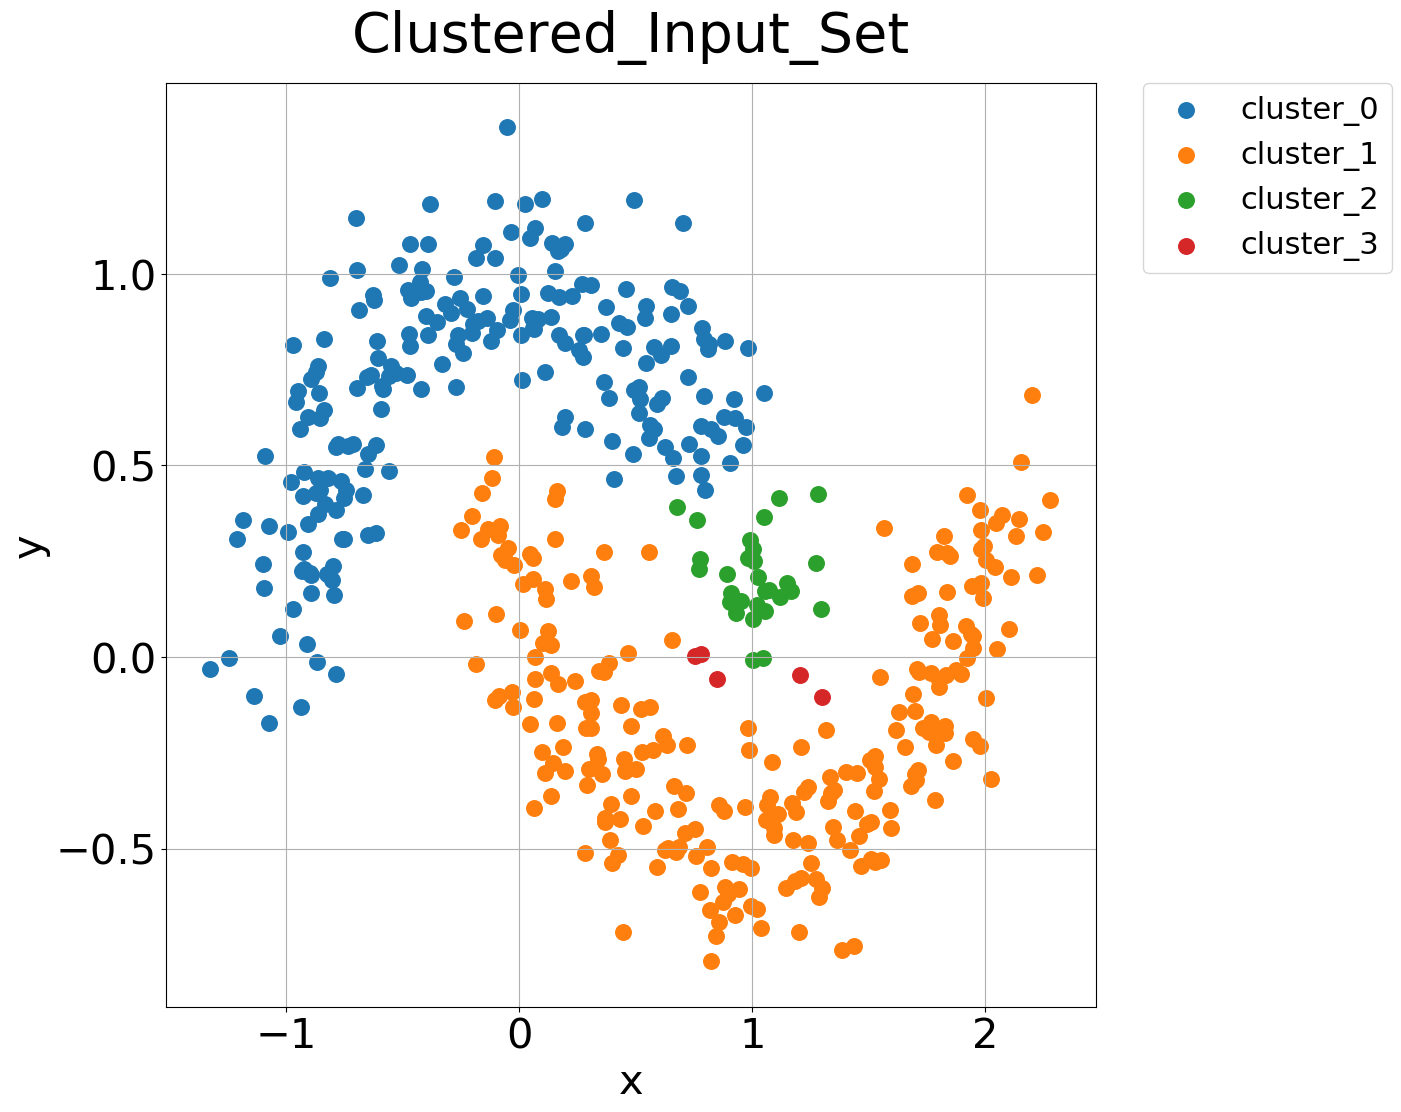

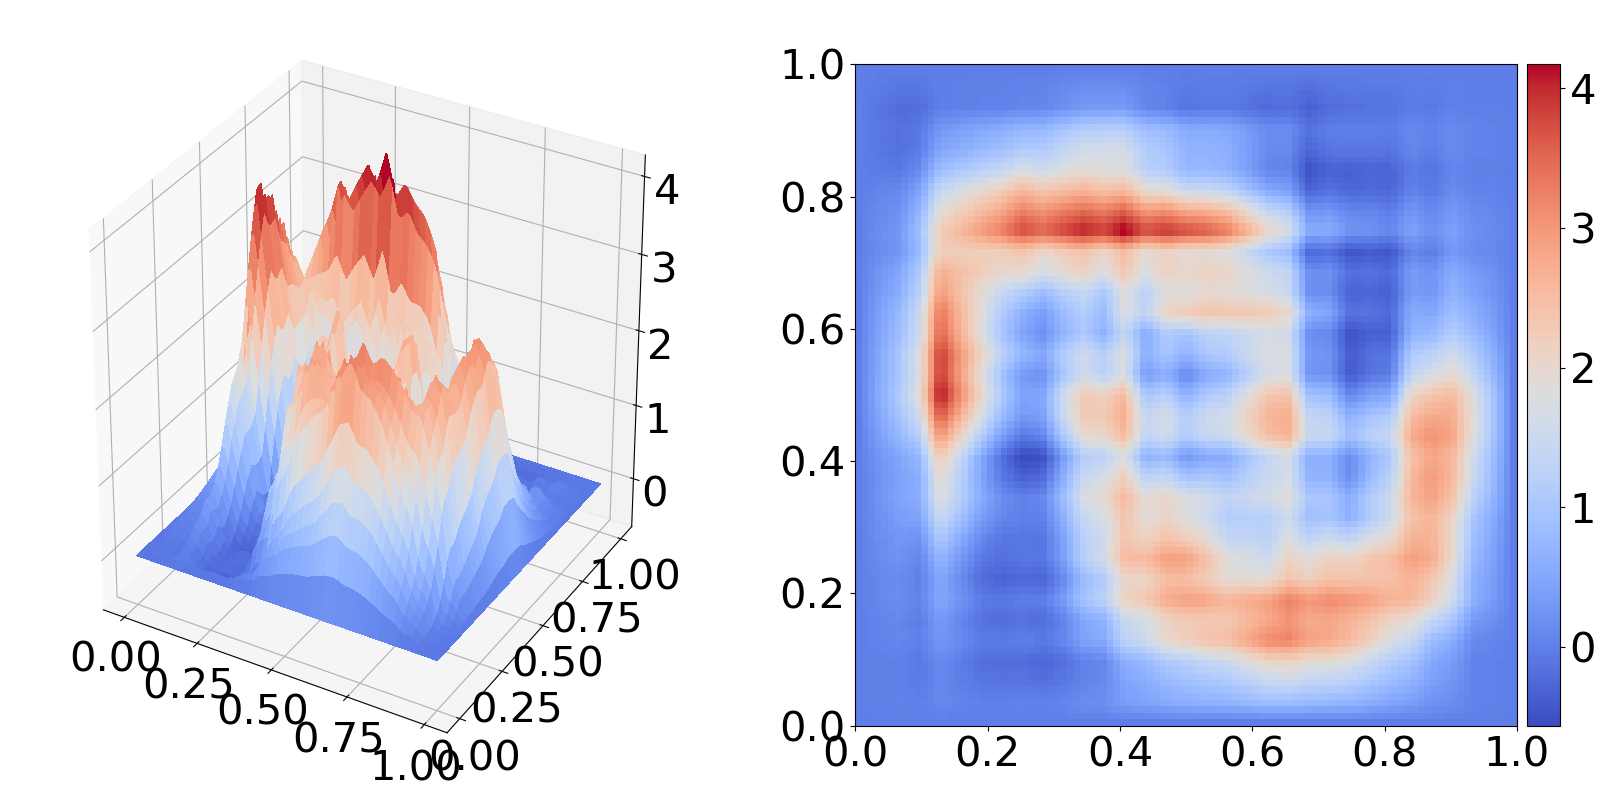

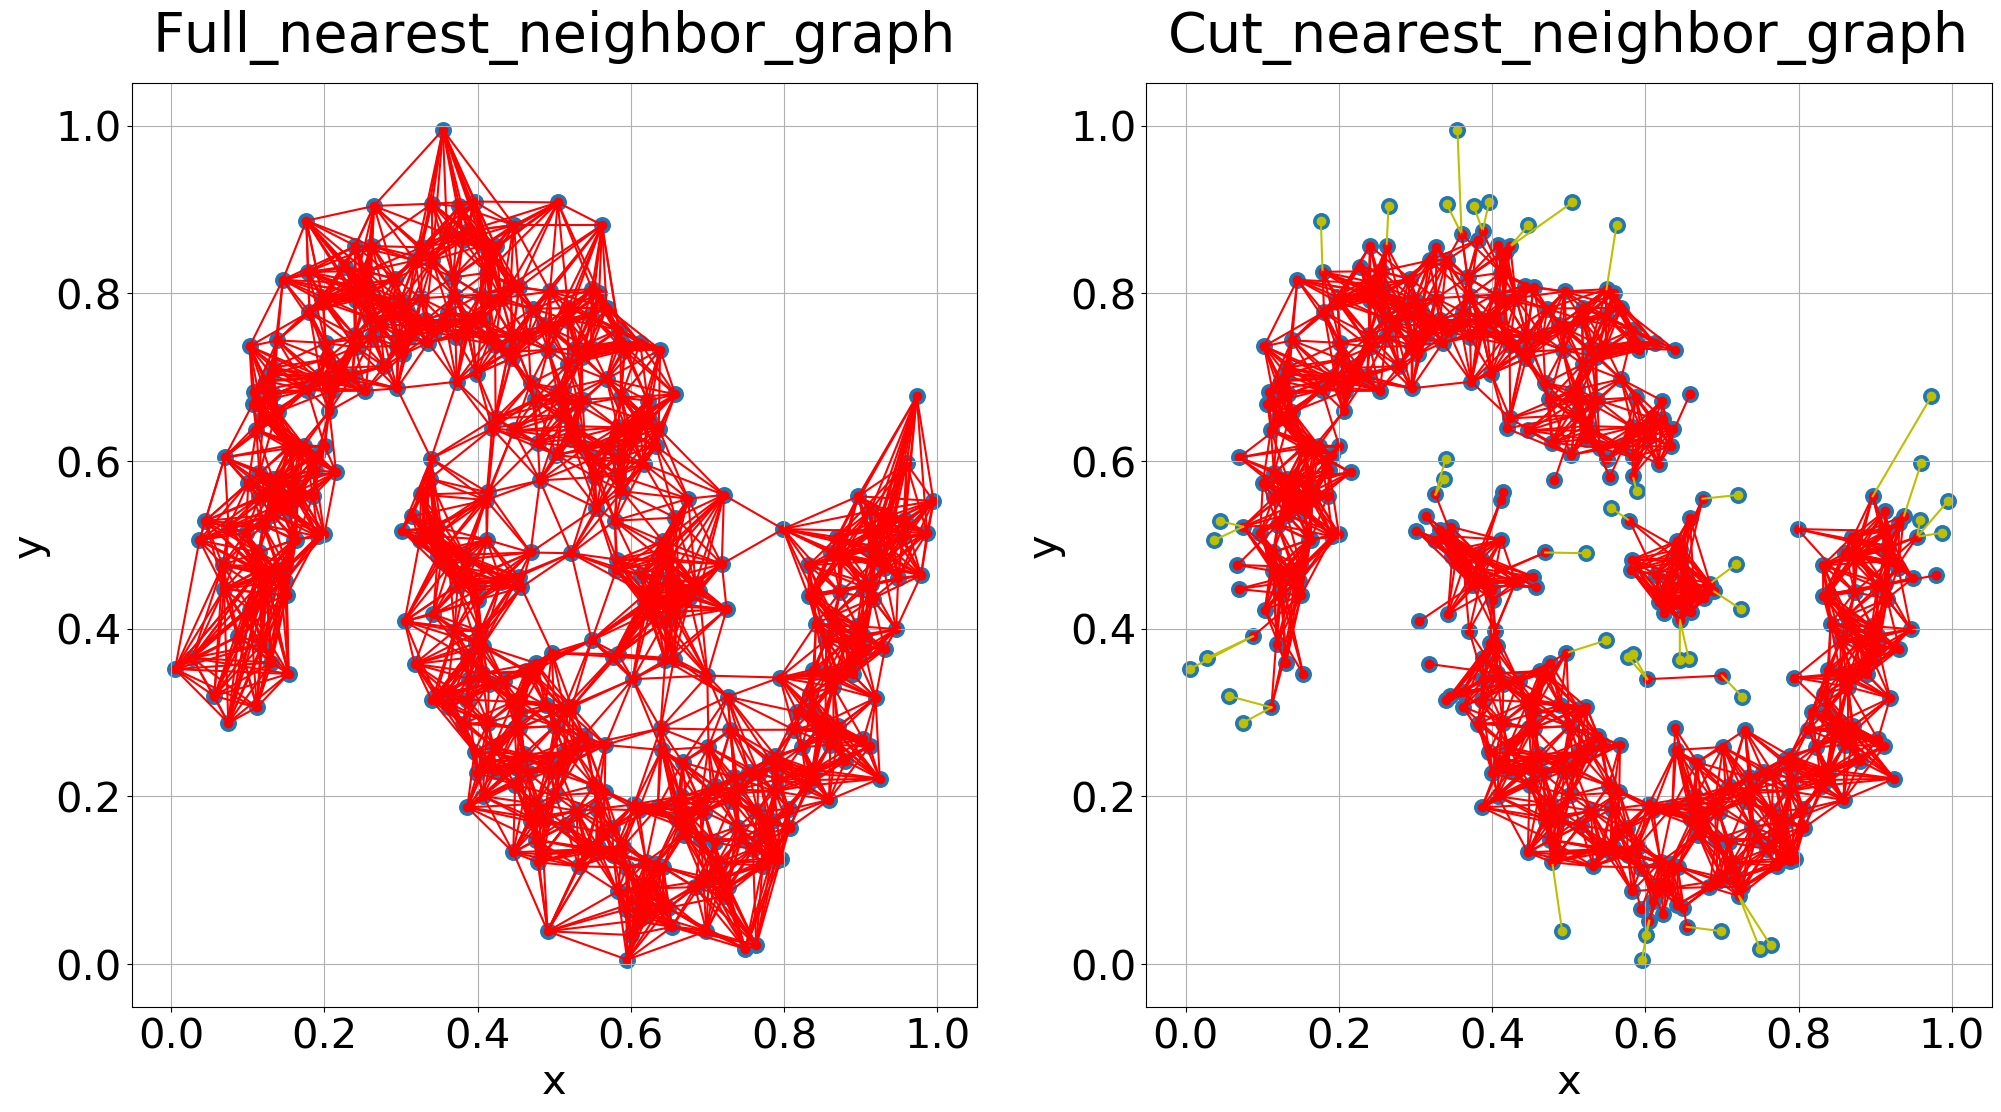

In [40]:
# initialize Clustering object with the original unedited data, 
# the number of nearest neighbors for the initial nearest neighbor graph (before cutting the edges) and 
# an edge cutting threshold (edges with lower estimated density than the threshold will be cut)
clus = deml.Clustering(data, number_nearest_neighbors=15, edge_cutting_threshold=0.4)

# as with the classification task, the learning process of clustering should be performed immediately after initialization
clus.perform_clustering(masslumping=True, lambd=0.0, minimum_level=1, maximum_level=5, print_metrics=True)
# classification.perform_clustering_dimension_wise(masslumping=True, lambd=0.0, minimum_level=1, maximum_level=5, print_metrics=True)

# but different than for Classification, only the final results can be returned
clus.print_evaluation(print_clusters=True)
clus.plot(plot_original_dataset=True, plot_clustered_dataset=True, plot_cluster_density_estimation=True, plot_cluster_combi_scheme=False, plot_cluster_sparsegrid=False, plot_nearest_neighbor_graphs=True)